# 2024-03-14
## Python Study for PBI Lab Crew

# 킹갓엠페러제너럴충무공마제스티하이퍼울트라
# SCIKIT-LEARN
https://scikit-learn.org/stable/

# 오늘 학습 목표 
## 1. 왜 머신러닝인가
## 2. 어떻게 학습되는 가
## 3. 차원이란?
## 4. KNN 해보기
## 5. SVM 해보기 


### 다음 주 모델 로스, opt, 이론 

## 아직까지도 많은 사람들이 뭐가 AI, ML(기계학습)과  DL(Deep Learning)을 혼동해요
![img](https://upload.wikimedia.org/wikipedia/commons/6/68/AI_relation_to_Generative_Models_subset%2C_venn_diagram.png)

간단하게 생각하면<br>
모델이 판단을 하는 가 -> AI <br>
모델이 학습이 가능한 가 -> ML <br>
신경망 구조를 가지는 가 -> DL (NN) <br>
모델의 결과가 없던 것인가 -> GM <br>

![img](수업자료1.png)

![img](수업자료2.png)

![img](수업자료3.png)

# 그럼 왜? 우리는 모델이 학습한다 라고 하는 것인가

## "주어진" 데이터로부터 "스스로" 파라미터(웨이트 등)을 수정해가며 더 나은 성능을 가지는 모델이 되어간다. "새로운" 데이터에서도 유의한 성능을 낼 수 있다.

위 문장을 통해서 알 수 있는 것처럼 기계학습 모델은 주어진 데이터를 학습하여 새로운 데이터에서도 성능을 낼 수 있는 모델을 말합니다.<br>
 학습을 하는 과정은 성능을 평가하는 과정, 스스로 파라미터를 Update 하는 과정으로 크게 나눌 수 있습니다. 두 과정을 반복하며 더 나은 모델이 되어가는 것이죠<br>
 이렇게 학습하는 것을 fit/fitting 이라합니다.
 
아무리 주어진 학습에 대하여 높은 성능을 가지더라도 새로운 데이터에 성능이 시원찮다면 옳바르게 학습된 모델이라 보기힘들다. 아래 그림을 보면 쉽게 이해할 수 있다.

![img](수업자료4.png)


이처럼 모델을 적절하게 학습시키는 것이 중요한데 그것을 위한 학습방법이 아래와 같다.

![img](수업자료5.png)

먼저 모델 학습에 사용될 데이터, 학습시 성능평가를 위한 데이터와 모델의 성능평가를 위한 데이터로 각각 나누어야 한다. 

![img](수업자료6.png)

    학습시 성능평가를 위한 데이터를 모델이 학습하지 않는 것은 데이터가 충분하지 않을 때 데이터를 낭비하는 것이기 때문에 이를 보완하기위해 위 같은 CV 방법을 사용한다.

# 차원??

![img](수업자료7.png)

![img](수업자료8.png)

![img](수업자료9.png)

![img](수업자료10.png)

![img](수업자료11.png)

## cf> 새로운 공간으로 데이터를 변환하는 것을 임베딩(Embedding)이라 합니다. ex> 자연어 -> 벡터 

우리는 차원 축소 방법 PCA와 UMAP을 각각 실습해볼 예정입니다.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.decomposition import PCA
import umap





tmm = pd.read_csv("kyuchan.TMM.matrix",sep = "\t", index_col=0)
print("변화 전")

tmm = tmm[['N10-na1', 'N10-na2', 'N10-na3', 'N10-na4', 'N10-na5', 'N11-na1',
       'N11-na2', 'N11-na3', 'N11-na4', 'N11-na5', 'P10-dh1', 'P10-dh2',
       'P10-dh3', 'P10-dh4', 'P10-dh5', 'P10-ur1', 'P10-ur2', 'P10-ur3',
       'P10-ur4', 'P10-ur5', 'P11-an1', 'P11-an2', 'P11-an3', 'P11-an4',
       'P11-an5', 'P11-as1', 'P11-as2', 'P11-as3', 'P11-as4', 'P11-as5']]
print("변화 후")
print(tmm)
samples = pd.DataFrame()
samples["Sample"] = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

변화 전
변화 후
                 N10-na1  N10-na2  N10-na3  N10-na4  N10-na5  N11-na1  \
Gene_ID                                                                 
nbis-gene-1        6.117    4.484    4.464    4.670    4.928    3.592   
nbis-gene-10      11.852   15.557   11.304   15.428   14.647   15.851   
nbis-gene-100      0.000    0.000    0.000    0.000    0.000    0.000   
nbis-gene-1000    63.659   37.232   47.662   39.004   44.232   30.876   
nbis-gene-10000   43.913   44.037   46.661   40.737   46.537   36.757   
...                  ...      ...      ...      ...      ...      ...   
nbis-gene-9995     0.422    0.000    0.116    0.085    0.141    0.226   
nbis-gene-9996    41.171   25.925   33.412   31.289   36.447   38.231   
nbis-gene-9997    32.713   20.486   20.637   17.186   20.888   21.215   
nbis-gene-9998     0.196    0.136    0.000    0.289    0.387    1.063   
nbis-gene-9999   583.890  347.841  282.691  305.694  340.723  272.459   

                 N11-na2  N11-na3  N11-n

In [7]:
tmm

,N10-na1,N10-na2,N10-na3,N10-na4,N10-na5,N11-na1,N11-na2,N11-na3,N11-na4,N11-na5,...,P11-an1,P11-an2,P11-an3,P11-an4,P11-an5,P11-as1,P11-as2,P11-as3,P11-as4,P11-as5
Gene_ID,,,,,,,,,,,,,,,,,,,,,
nbis-gene-1,6.117,4.484,4.464,4.670,4.928,3.592,3.636,3.500,3.989,3.956,...,4.831,5.216,5.634,4.123,5.595,5.650,6.744,4.714,4.570,4.676
nbis-gene-10,11.852,15.557,11.304,15.428,14.647,15.851,14.364,17.672,14.292,15.320,...,12.254,15.192,18.179,13.901,13.079,11.132,14.707,14.908,11.596,11.144
nbis-gene-100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
nbis-gene-1000,63.659,37.232,47.662,39.004,44.232,30.876,38.110,35.617,40.563,40.434,...,37.186,43.485,48.356,41.909,39.485,50.615,39.109,49.733,38.950,36.870
nbis-gene-10000,43.913,44.037,46.661,40.737,46.537,36.757,46.439,45.908,37.376,32.841,...,34.514,33.357,39.701,35.773,42.467,37.328,45.806,53.169,41.101,37.429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nbis-gene-9995,0.422,0.000,0.116,0.085,0.141,0.226,0.149,0.042,0.141,0.497,...,0.114,0.171,0.044,0.135,0.221,0.025,0.008,0.024,0.314,0.206
nbis-gene-9996,41.171,25.925,33.412,31.289,36.447,38.231,40.949,51.102,40.206,38.889,...,39.749,46.531,40.827,40.418,42.889,38.358,34.360,48.020,36.838,34.096
nbis-gene-9997,32.713,20.486,20.637,17.186,20.888,21.215,14.995,24.777,14.255,15.254,...,14.110,18.313,28.851,17.073,14.948,16.701,32.221,20.482,18.841,13.515


In [9]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.dpi"] = 200

In [10]:
def Sample_PCA(TPM_df,Samples_df):
    pca_data =TPM_df.T
    pca = PCA(n_components=2)

    pca.fit(pca_data)
    x_pca = pca.transform(pca_data)

    pca_df = pd.DataFrame(x_pca)
    pca_df['Sample'] = Samples_df["Sample"]
    pca_df.head()

    sns.scatterplot(data=pca_df, x=0, y=1, hue='Sample')
    
    plt.xlabel("PC 1 [{}%]".format(round(pca.explained_variance_ratio_[0]*100,2)))
    plt.ylabel("PC 2 [{}%]".format(round(pca.explained_variance_ratio_[1]*100,2)))
    plt.legend(loc = 2, bbox_to_anchor = (1,1))

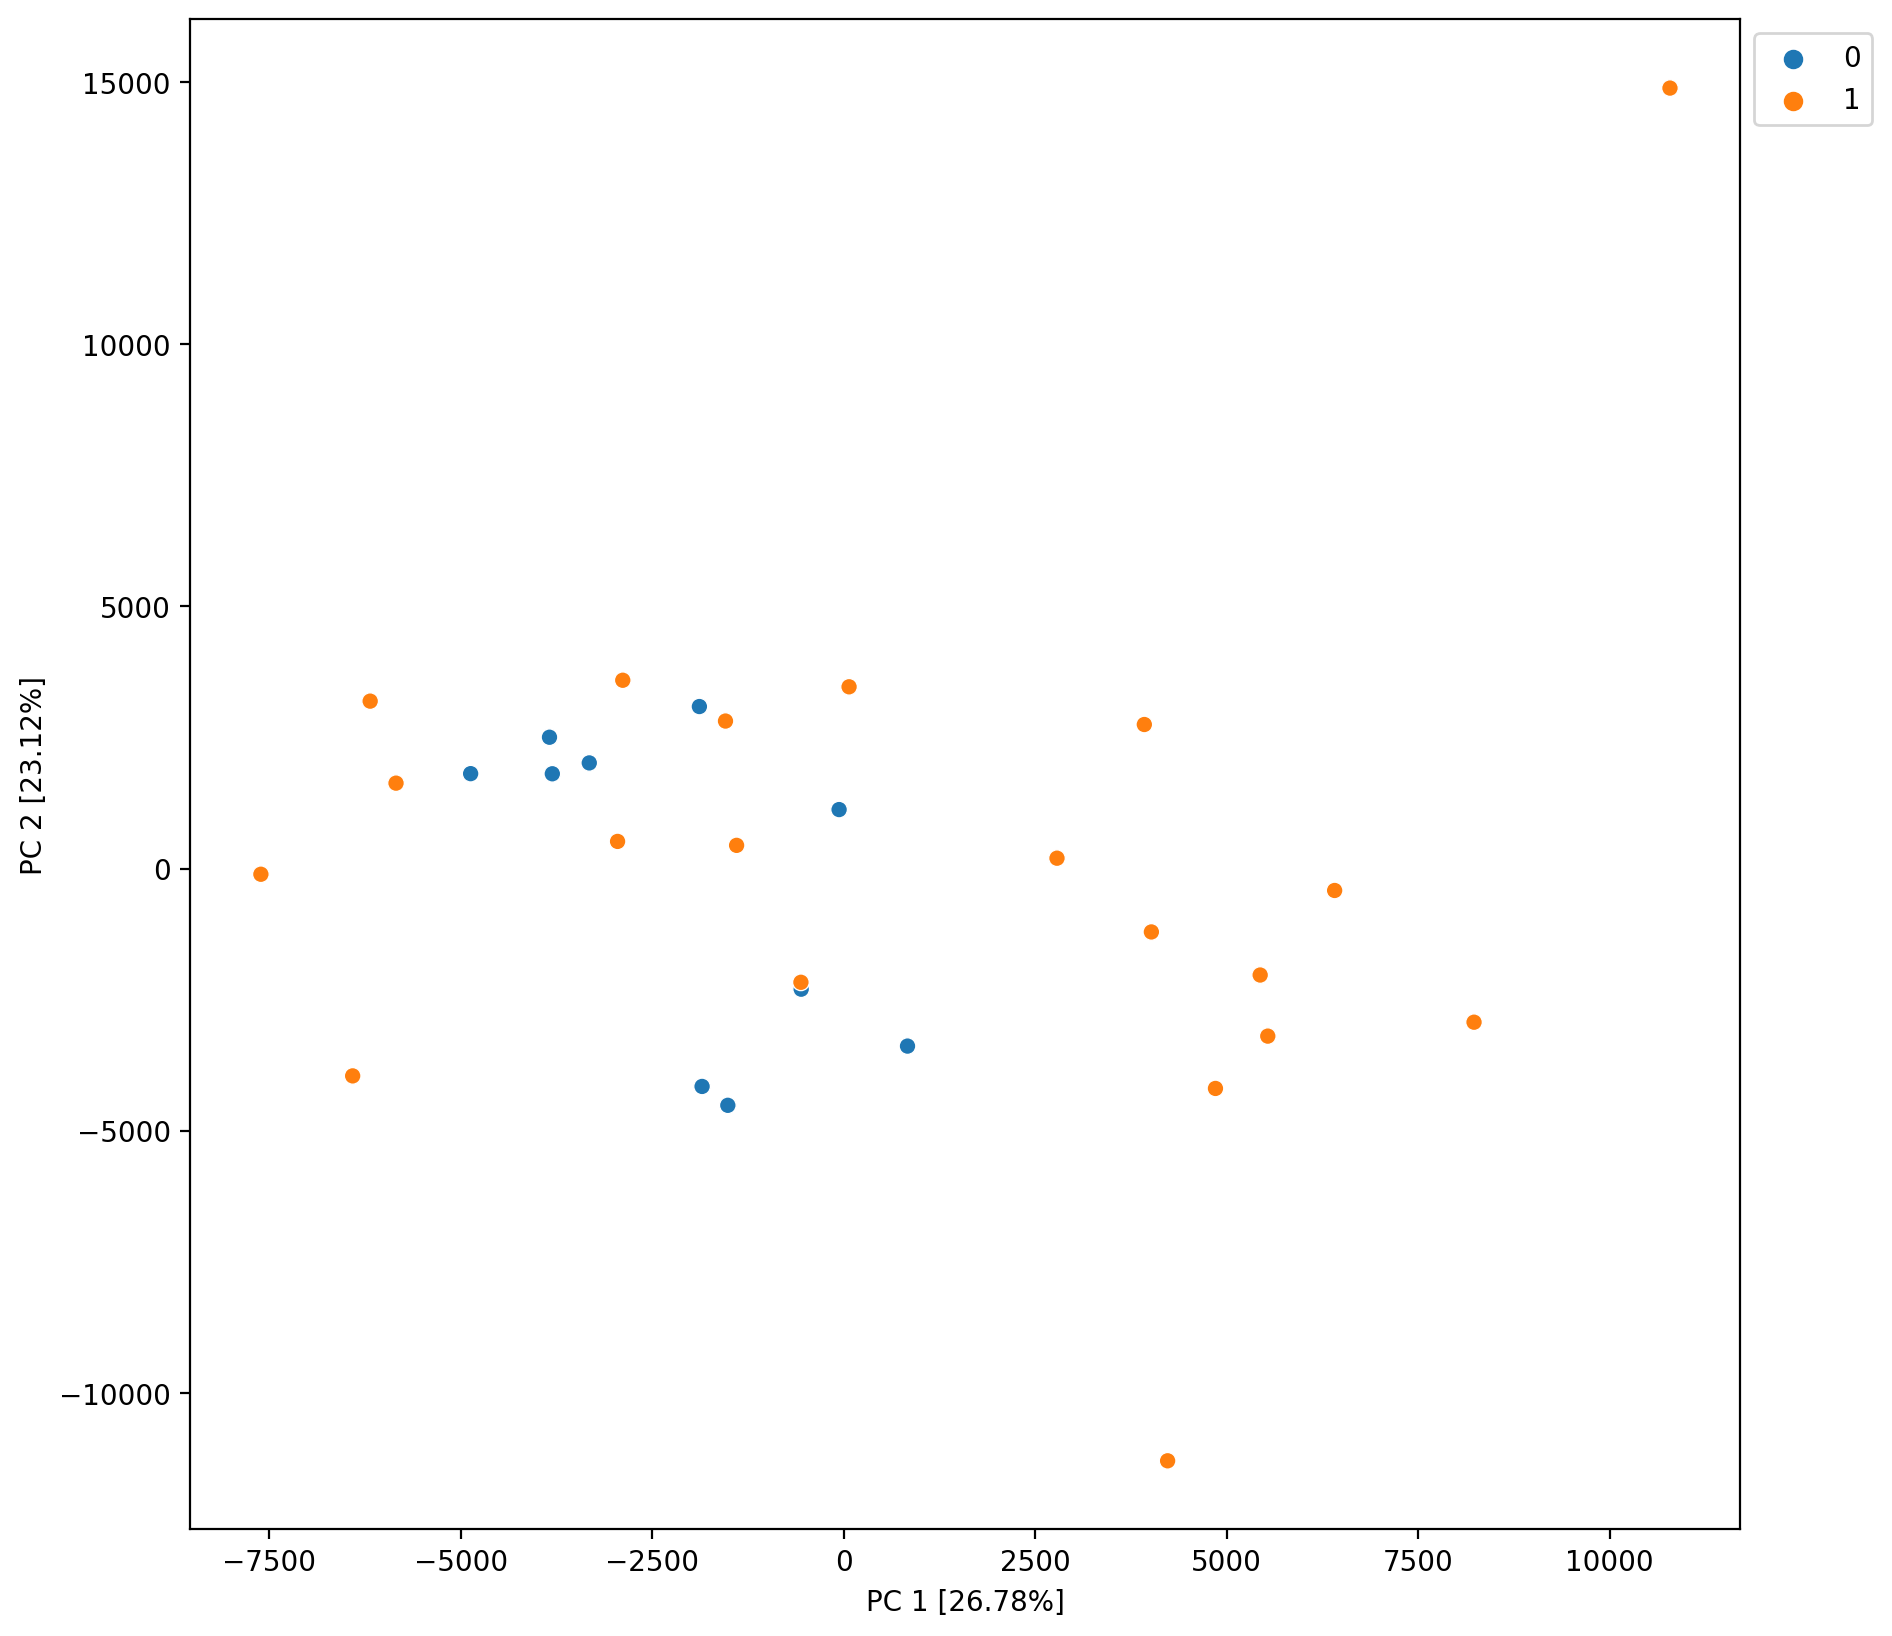

In [11]:
Sample_PCA(tmm, samples)

In [12]:
def Sample_UMAP(TPM_df,Samples_df):
    reducer = umap.UMAP()

    # Fit the UMAP object to the data and transform the data to 2D
    embedding = reducer.fit_transform(TPM_df.T)
    umap_df = pd.DataFrame(embedding)
    umap_df['Fireblight'] = samples["Sample"]
    umap_df.head()
    # Visualize the results using matplotlib
    sns.scatterplot(data=umap_df, x=0, y=1, hue='Fireblight')
    plt.legend(loc = 1, bbox_to_anchor = (0,0))
    

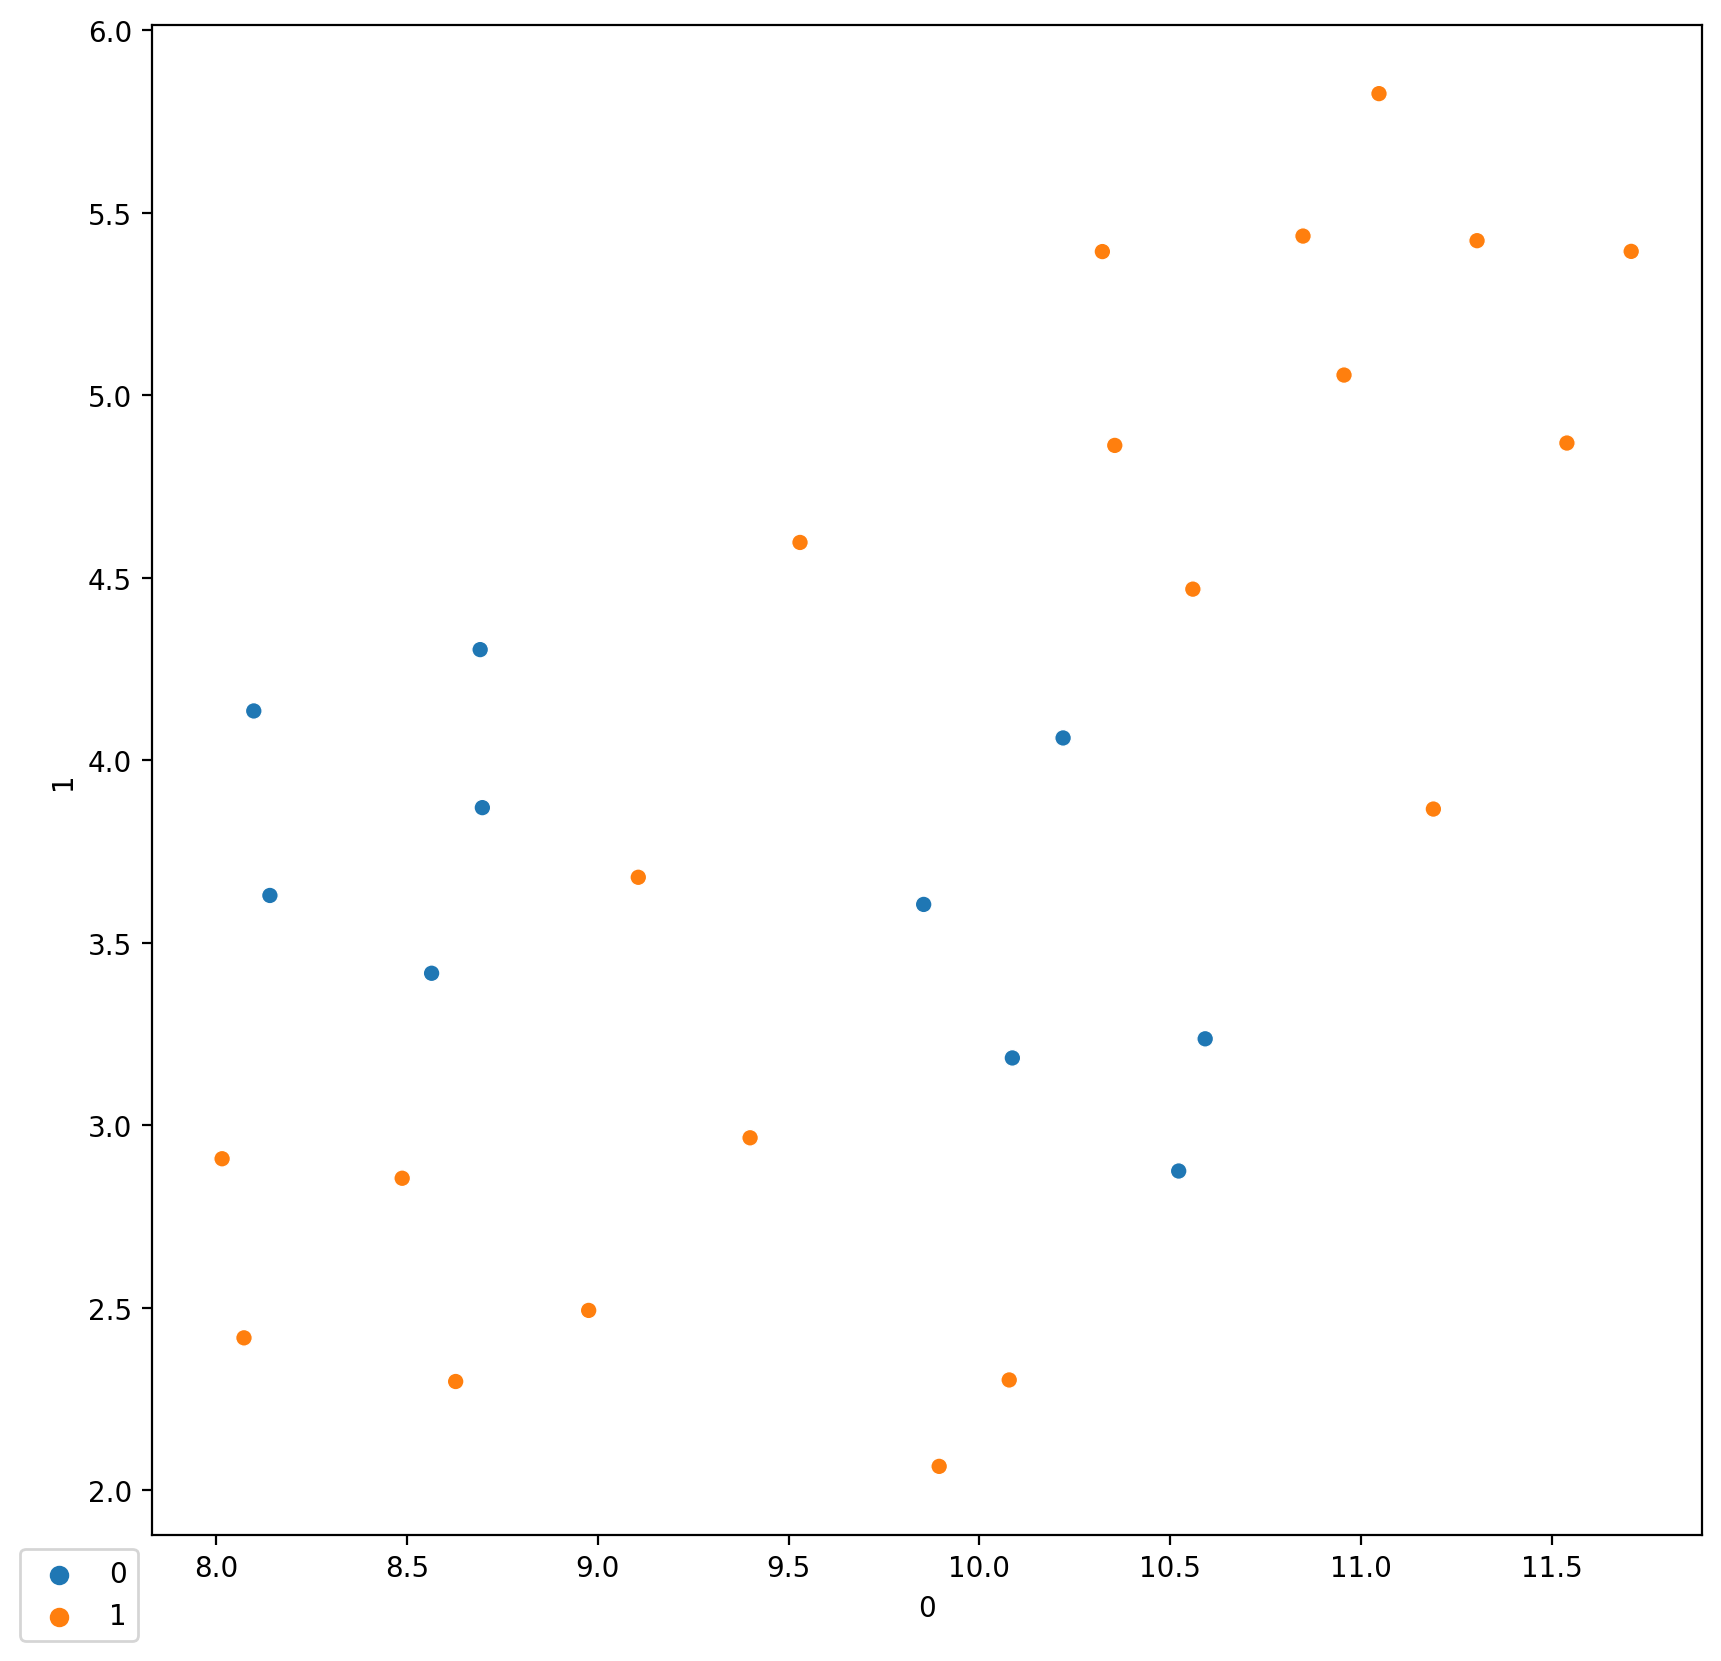

In [13]:
Sample_UMAP(tmm, samples)

## 생각해보기 
UMAP은 Clustering을 하기전에 사용하는 차원 축소방법으로 널리 사용되고 있습니다. 그에 비해 현재 PCA는 다른 분석의 전처리 과정으로서 사용되어지는 데 한계가 있는데요. 왜 그럴지 아래 셀에 작성해서 저에게 보여주세요 ^^

# KNN 구연하기

![img](https://miro.medium.com/v2/resize:fit:640/format:webp/1*X1KBJctko0RH6BWBsu-XjA.png)

In [14]:
from sklearn import neighbors, datasets    # KNN운 neighbors에, 실습할 데이터 iris는 datasets에
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # KNN의 분류 영역 표시를 위한 컬러맵
import mglearn


In [15]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(tmm.T, samples["Sample"], test_size = 0.1, random_state = 0)

In [16]:
trnx


Gene_ID,nbis-gene-1,nbis-gene-10,nbis-gene-100,nbis-gene-1000,nbis-gene-10000,nbis-gene-10001,nbis-gene-10002,nbis-gene-10003,nbis-gene-10004,nbis-gene-10005,...,nbis-gene-9990,nbis-gene-9991,nbis-gene-9992,nbis-gene-9993,nbis-gene-9994,nbis-gene-9995,nbis-gene-9996,nbis-gene-9997,nbis-gene-9998,nbis-gene-9999
P10-dh1,5.073,15.674,0.0,37.906,48.460,25.547,1.117,0.0,42.693,37.502,...,8.777,2.219,194.955,1.932,2.117,0.473,42.654,19.924,0.477,304.580
P11-as2,6.744,14.707,0.0,39.109,45.806,21.587,0.608,0.0,40.200,25.778,...,5.385,2.180,228.080,1.913,2.440,0.008,34.360,32.221,0.675,180.175
P11-an5,5.595,13.079,0.0,39.485,42.467,19.833,1.260,0.0,43.083,36.318,...,6.661,2.199,207.407,1.685,4.356,0.221,42.889,14.948,1.135,300.613
P11-as3,4.714,14.908,0.0,49.733,53.169,15.139,0.369,0.0,44.677,29.492,...,6.105,2.032,165.180,0.645,1.570,0.024,48.020,20.482,0.203,278.582
P10-dh2,5.201,17.504,0.0,37.201,54.556,25.244,0.854,0.0,40.443,34.853,...,9.235,1.506,235.189,2.205,2.915,0.159,39.339,24.136,0.545,375.239
P10-ur3,5.984,21.114,0.0,38.773,56.627,21.985,1.284,0.0,30.973,38.170,...,4.744,2.871,136.577,0.644,3.242,0.254,36.093,25.530,0.560,293.712
P11-an3,5.634,18.179,0.0,48.356,39.701,23.752,0.899,0.0,46.315,31.272,...,6.879,1.016,151.273,1.522,2.040,0.044,40.827,28.851,0.546,255.504
N11-na1,3.592,15.851,0.0,30.876,36.757,25.576,1.343,0.0,49.101,33.178,...,16.151,3.915,161.240,2.053,3.504,0.226,38.231,21.215,1.063,272.459
P10-ur2,5.682,13.826,0.0,30.272,38.903,17.766,4.522,0.0,40.828,37.672,...,7.870,2.331,218.650,1.757,5.763,0.227,34.536,16.752,1.217,273.551
N11-na4,3.989,14.292,0.0,40.563,37.376,25.873,0.839,0.0,36.285,41.429,...,17.326,4.419,143.240,1.100,1.815,0.141,40.206,14.255,0.357,295.549


In [27]:
tstx

Gene_ID,nbis-gene-1,nbis-gene-10,nbis-gene-100,nbis-gene-1000,nbis-gene-10000,nbis-gene-10001,nbis-gene-10002,nbis-gene-10003,nbis-gene-10004,nbis-gene-10005,...,nbis-gene-9990,nbis-gene-9991,nbis-gene-9992,nbis-gene-9993,nbis-gene-9994,nbis-gene-9995,nbis-gene-9996,nbis-gene-9997,nbis-gene-9998,nbis-gene-9999
N10-na3,4.464,11.304,0.0,47.662,46.661,31.331,0.160,0.0,38.236,51.053,...,9.835,2.175,148.758,1.165,0.379,0.116,33.412,20.637,0.000,282.691
P11-as4,4.570,11.596,0.0,38.950,41.101,21.189,1.388,0.0,34.014,34.084,...,12.111,3.732,245.163,2.473,3.572,0.314,36.838,18.841,0.760,258.064
P10-dh4,5.130,14.481,0.0,37.911,36.616,22.725,0.433,0.0,39.886,40.832,...,14.450,1.422,315.903,2.504,2.905,0.522,43.900,24.231,0.426,336.708


## 일부데이터를 UMAP을 fitting 합니다.

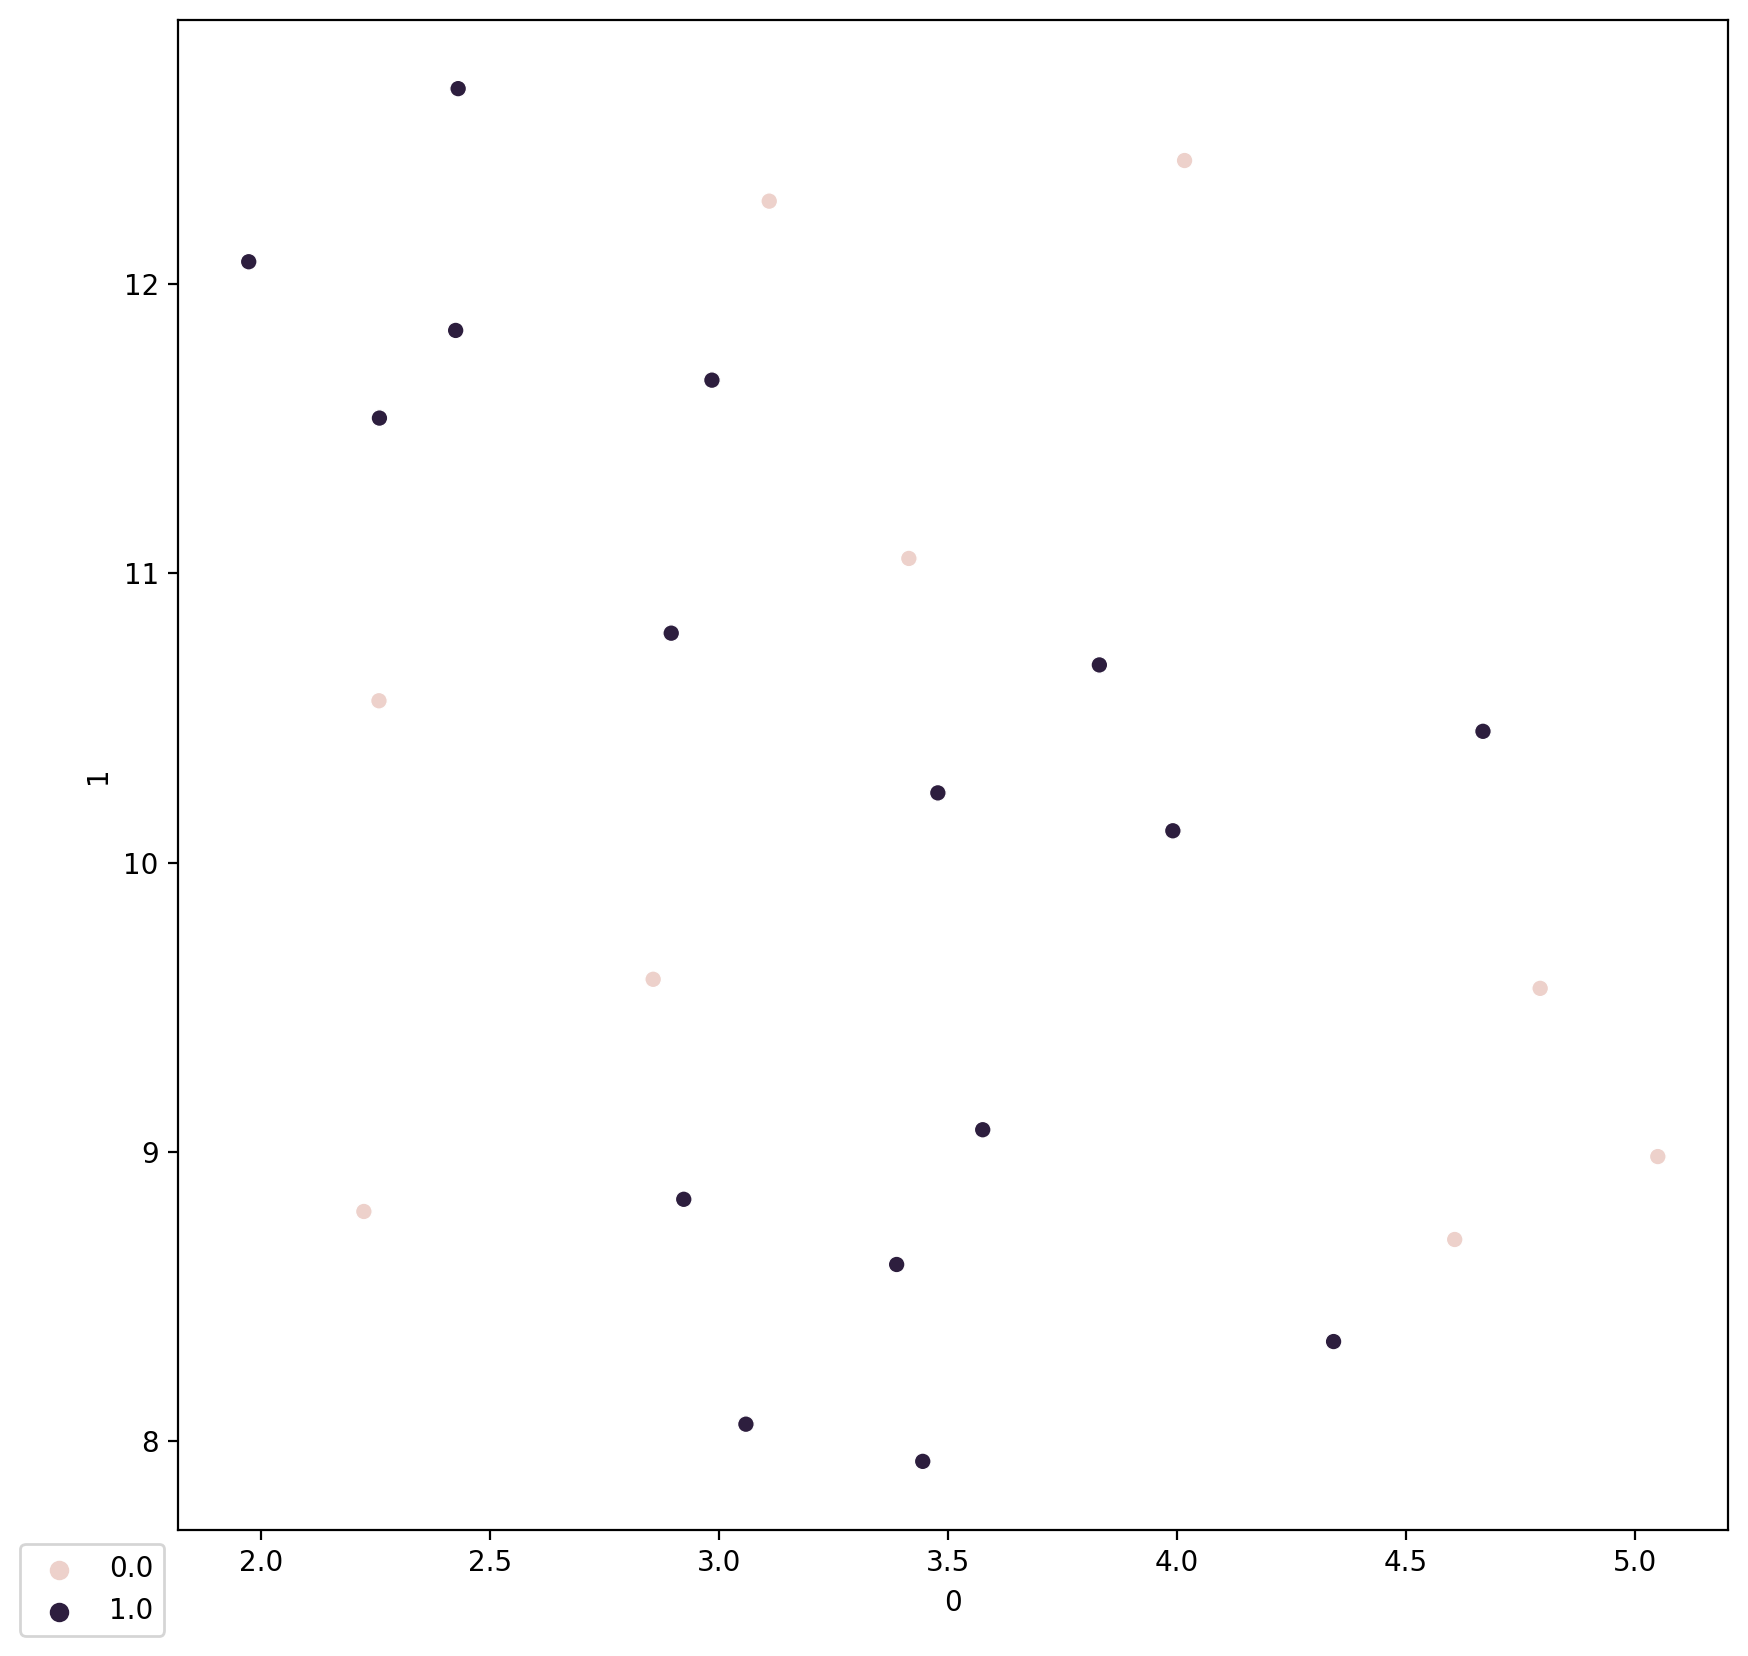

In [23]:
reducer = umap.UMAP()

# Fit the UMAP object to the data and transform the data to 2D
embedding = reducer.fit_transform(trnx)
umap_df = pd.DataFrame(embedding)
umap_df['Fireblight'] = trny
umap_df.head()

# Visualize the results using matplotlib
sns.scatterplot(data=umap_df, x=0, y=1, hue='Fireblight')
plt.legend(loc = 1, bbox_to_anchor = (0,0))

In [24]:
tstx_UMAP = reducer.transform(tstx)

In [25]:
embedding

array([[ 4.7929583,  9.565106 ],
       [ 4.0167   , 12.426537 ],
       [ 3.8412375, 11.91444  ],
       [ 3.4148288, 11.0511265],
       [ 2.2251146,  8.793851 ],
       [ 5.049786 ,  8.983646 ],
       [ 3.1100354, 12.28613  ],
       [ 2.8566625,  9.59643  ],
       [ 4.60639  ,  8.69702  ],
       [ 2.2580862, 10.559151 ],
       [ 2.8960922, 10.792796 ],
       [ 2.430935 , 12.675014 ],
       [ 2.425514 , 11.83925  ],
       [ 3.803621 ,  8.045155 ],
       [ 1.9737592, 12.076686 ],
       [ 3.4781303, 10.240752 ],
       [ 3.0591242,  8.058645 ],
       [ 4.3420067,  8.344241 ],
       [ 2.923428 ,  8.835942 ],
       [ 3.9911175, 10.109757 ],
       [ 3.8307006, 10.683033 ],
       [ 2.9849298, 11.667378 ],
       [ 3.3881903,  8.610631 ],
       [ 3.4451451,  7.93011  ],
       [ 2.2590976, 11.536279 ],
       [ 3.5760639,  9.076395 ],
       [ 4.6681085, 10.453557 ]], dtype=float32)

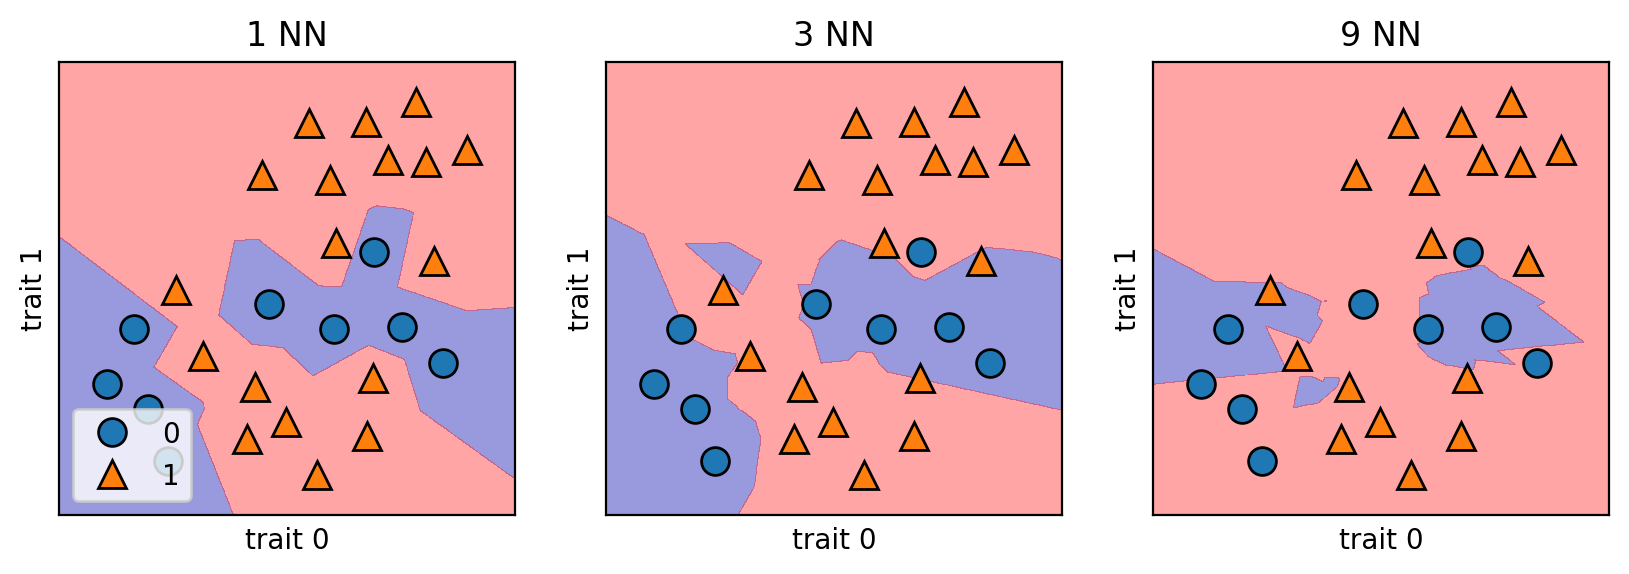

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.dpi"] = 200

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 객체를 반환합니다.
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있습니다.
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors).fit(embedding, trny)
    mglearn.plots.plot_2d_separator(clf, embedding, fill=True, eps=0.5, 
                                    ax=ax, alpha=.4)
    mglearn.discrete_scatter(embedding[:, 0], embedding[:, 1], trny, ax=ax)
    ax.set_title("{} NN".format(n_neighbors))
    ax.set_xlabel("trait 0")
    ax.set_ylabel("trait 1")
axes[0].legend(loc=3)


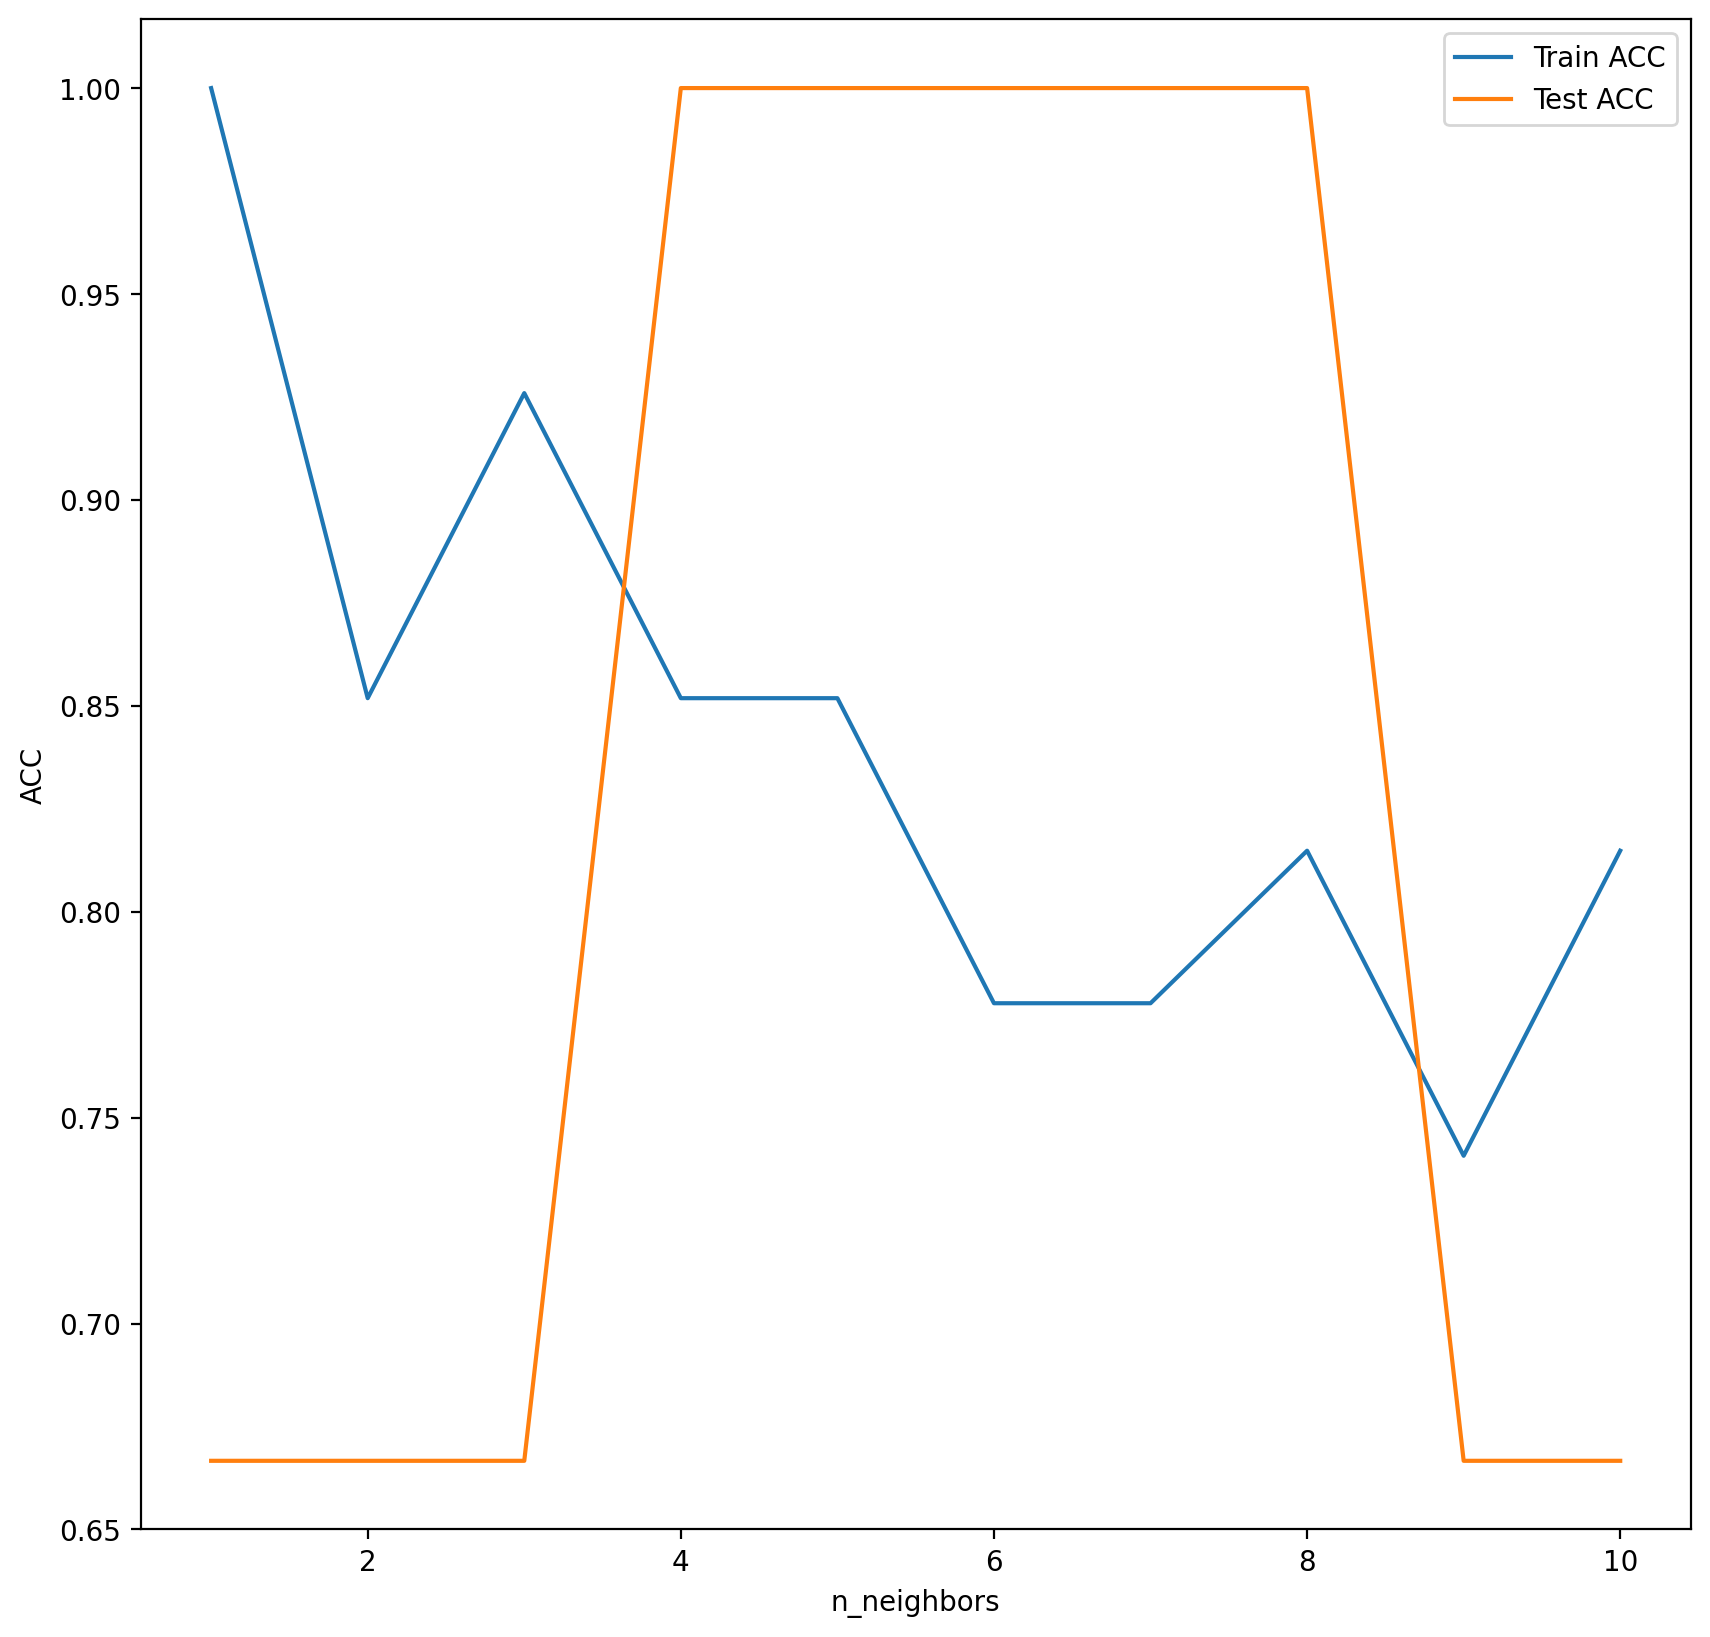

In [45]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(embedding, trny)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(embedding, trny))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(tstx_UMAP, tsty))

plt.plot(neighbors_settings, training_accuracy, label="Train ACC")
plt.plot(neighbors_settings, test_accuracy, label="Test ACC")
plt.ylabel("ACC")
plt.xlabel("n_neighbors")
plt.legend()

위 그림에서 성능이 가장 좋은 3을 선택합니다.

In [50]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5).fit(embedding, trny)
clf.fit(embedding,trny)

KNeighborsClassifier()

In [51]:
clf.score(tstx_UMAP,tsty)

1.0

## 만약 UMAP을 사용하지 않는다면??

In [17]:
from sklearn.preprocessing import StandardScaler

# UMAP 대신 데이터 전처리를 StandardScaler이용해서 합니다.
scaler = StandardScaler()
scaler.fit(trnx)
trnx_scaled = scaler.transform(trnx)
tstx_scaled = scaler.transform(tstx)

In [18]:
print(scaler.fit(trnx))

StandardScaler()


In [19]:
trnx_scaled

array([[ 3.63069222e-02,  2.98645789e-01,  0.00000000e+00, ...,
         1.01177083e-02, -5.25067939e-01, -1.74825714e-03],
       [ 2.04373267e+00, -1.30865222e-01,  0.00000000e+00, ...,
         2.37746893e+00, -1.03030019e-02, -1.84779733e+00],
       [ 6.63402218e-01, -8.53971661e-01,  0.00000000e+00, ...,
        -9.47834612e-01,  1.18561554e+00, -6.06146747e-02],
       ...,
       [ 2.08097396e-01,  8.45565359e-02,  0.00000000e+00, ...,
        -3.00023206e-01,  4.73264060e-01, -7.08664634e-01],
       [ 8.18374045e-01,  1.60805474e+00,  0.00000000e+00, ...,
         3.86291108e-01, -1.81891314e-01, -4.93558108e-01],
       [ 6.86227526e-01, -9.44582050e-01,  0.00000000e+00, ...,
        -8.57930325e-01, -9.02042262e-01,  4.86262803e-01]])

In [20]:
tstx_scaled

array([[-0.69530426, -1.64237088,  0.        , ...,  0.14738057,
        -1.76518347, -0.32655971],
       [-0.56796307, -1.51267366,  0.        , ..., -0.19837553,
         0.21068195, -0.69200041],
       [ 0.10478285, -0.23124732,  0.        , ...,  0.83927781,
        -0.65765891,  0.47499998]])

In [ ]:
#clf = neighbors.KNeighborsClassifier(n_neighbors=3).fit(trnx, trny)
#clf.fit(trnx,trny)
#clf.score(tstx_scaled,tsty)

연산시간도 많이 늘어나고<br>
(모든 점간 거리 계산을 진행하기 때문에 KNN은 데이터의 수와 차원의 개수의 따라 연산시간이 많이 차이가 난다)

#  Support Vector Machine(SVM)

![img](https://velog.velcdn.com/images/shlee0125/post/0a39784c-0859-48f7-8da0-d0a44533e73f/image.png)
https://velog.io/@shlee0125/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%A0%95%EB%A6%AC-Support-Vector-Machine-05.-Why-does-SVM-maximize-margin

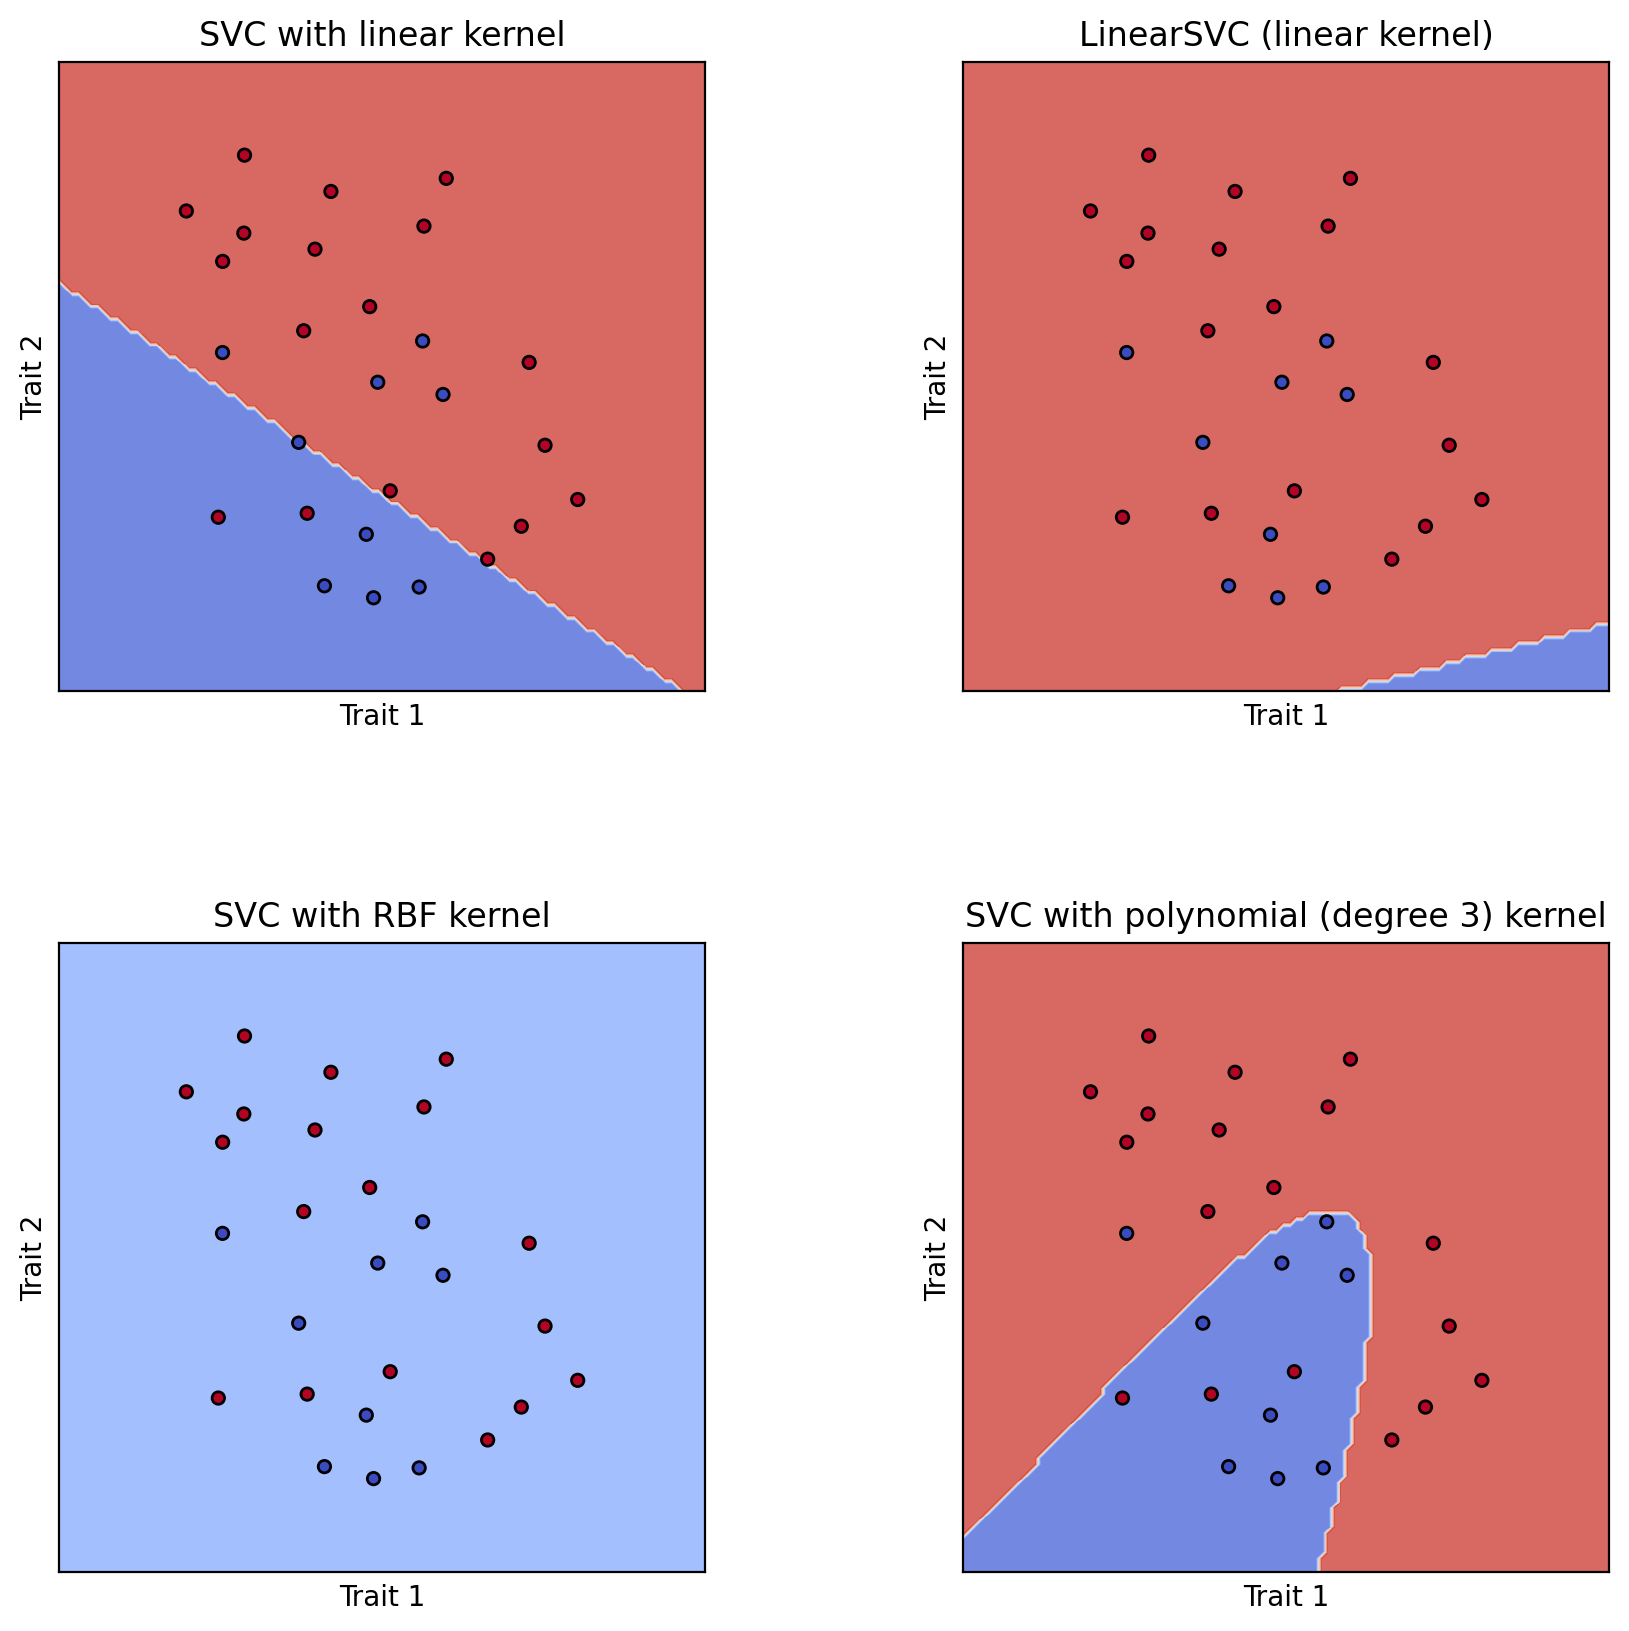

In [32]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.dpi"] = 200

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 0.35  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(embedding, trny) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = embedding[:, 0], embedding[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        embedding,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel= "Trait 1",
        ylabel= "Trait 2",
    )
    ax.scatter(X0, X1, c=trny, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

SVM의 경우에는 너무 차원이 낮아서 오히려 성능이 저하되는 결과를 볼 수 있습니다. 

다시 차원을 올려서 확인을 해볼까요??

In [57]:
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold


estimator = SVC(kernel="linear")


In [58]:
selector = estimator.fit(trnx_scaled, trny)

In [59]:
selector.score(tstx_scaled,tsty)

1.0

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
selector = RFECV(estimator, step=1, cv=StratifiedKFold(5), n_jobs=-1,scoring="accuracy")
selector = selector.fit(trnx_scaled, trny)

In [ ]:
# sns 스타일
sns.set_style('white')

# plot 사이즈
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.dpi"] = 200

n_scores = len(selector.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(0, n_scores),
    selector.cv_results_["mean_test_score"],
    #yerr=selector.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features", fontsize=20)
plt.show()